In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

In [7]:
crypten_data = pd.read_csv('crypten_experiments/datasize_nn.csv', skiprows=(lambda x: (x % 2 != 0)))
crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
14      326.754222      0          64       7500    0.1110     123.076313
15      324.844453      1          64       7500    0.1420     120.906320
16      325.117119      2          64       7500    0.1827     123.195792
17      329.731910      0          64       7500    0.4314     122.990935
18      331.517049      1          64       7500    0.4393     124.898937
19      328.722831      2          64       7500    0.4463     123.569881
20      660.024929      0          64      15000    0.2029     122.754379
21      663.470128      1          64      15000    0.2546     121.724306
22      656.050495      2          64      15000    0.3385     123.370837
23      646.027991      0          64      15000    0.3665     120.036589
24      646.170944      1          64      15000    0.4018     118.788347
25      644.250591      2          64      15000    0.4160     119.101177
26     1315.274356      0          64 

In [ ]:
torch_data = pd.read_csv('torch/datasize_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
14      326.754222      0          64       7500    0.1110     123.076313
15      324.844453      1          64       7500    0.1420     120.906320
16      325.117119      2          64       7500    0.1827     123.195792
17      329.731910      0          64       7500    0.4314     122.990935
18      331.517049      1          64       7500    0.4393     124.898937
19      328.722831      2          64       7500    0.4463     123.569881
20      660.024929      0          64      15000    0.2029     122.754379
21      663.470128      1          64      15000    0.2546     121.724306
22      656.050495      2          64      15000    0.3385     123.370837
23      646.027991      0          64      15000    0.3665     120.036589
24      646.170944      1          64      15000    0.4018     118.788347
25      644.250591      2          64      15000    0.4160     119.101177
26     1315.274356      0          64 

In [8]:
mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].mean()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].mean()
print(mean_torch)

data_size
7500      327.781264
15000     652.665846
30000    1309.449745
60000    2587.767321
Name: epoch_duration, dtype: float64


data_size
7500      327.781264
15000     652.665846
30000    1309.449745
60000    2587.767321
Name: epoch_duration, dtype: float64


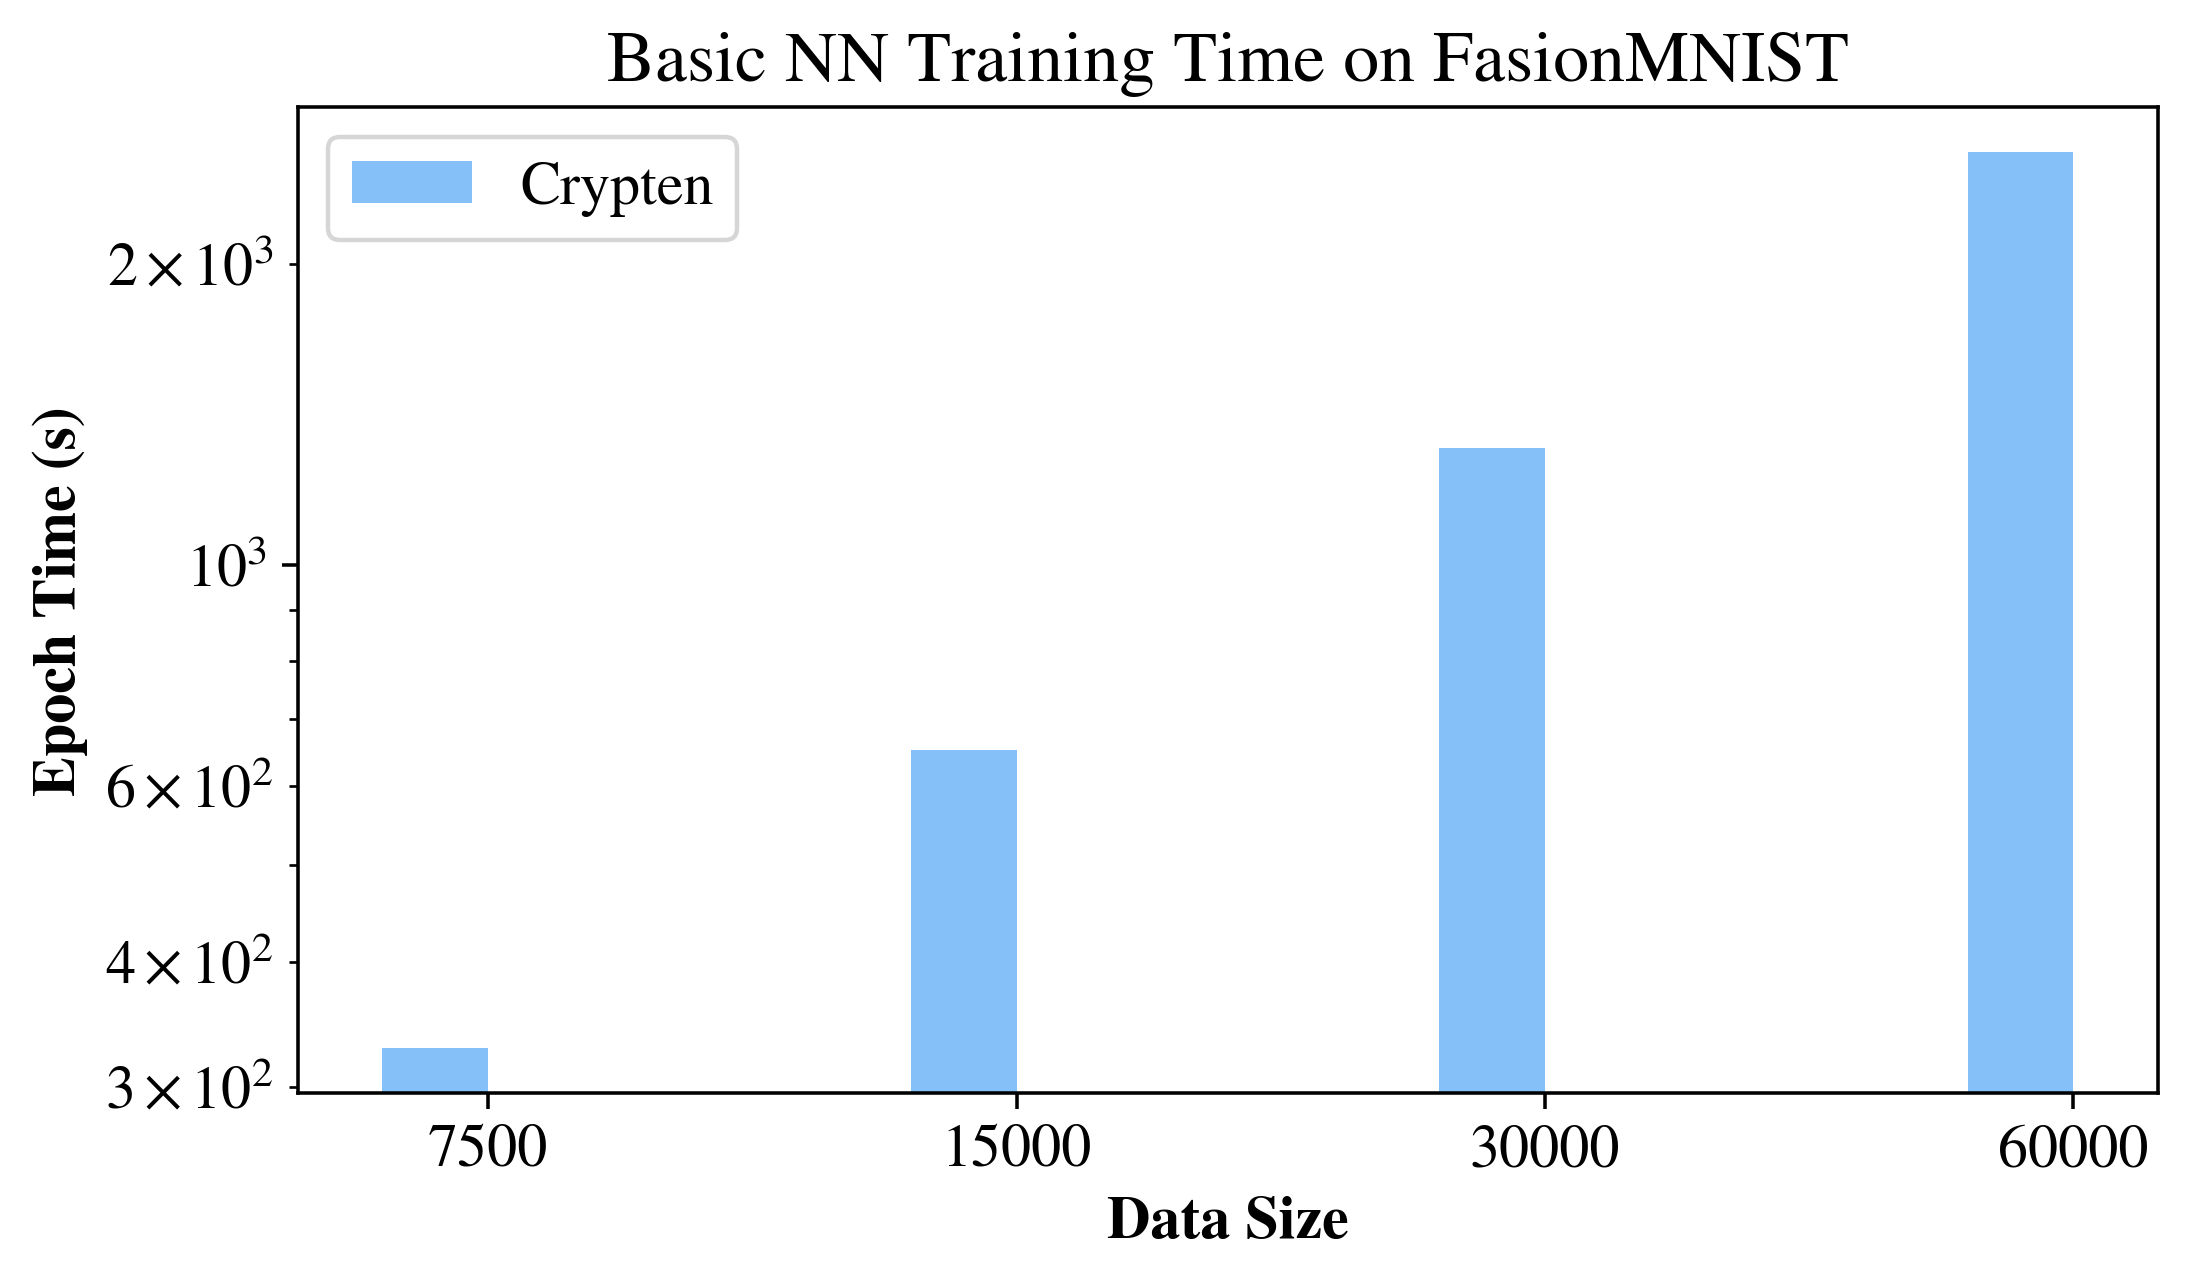

In [9]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis+width/2, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Epoch Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("nn_datasize.pdf", bbox_inches='tight')

plt.show()